In [49]:
#Importing the Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
%matplotlib inline
np.random.seed(42)

In [50]:
#Getting the Data
import tarfile
from six.moves import urllib

HOUSING_PATH = os.path.join("datasets","housing")
global FILE_NAME
FILE_NAME =  "housing.csv"

def load_housing_data(house_data_path):
    csv_file = os.path.join(house_data_path, FILE_NAME)
    return pd.read_csv(csv_file)

In [51]:
#Function for Saving the Plots in the PNG Image Format
IMAGE_PATH = "images/"
def fig_saver(figuere_name, tight_layout=True, file_type="png", resolution=300):
    path_file = os.path.join(IMAGE_PATH, figuere_name+"."+file_type)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path_file, format=file_type, dpi=resolution)
    print(f"File: {figuere_name} Saved to: {path_file}")

### Some Data Analysis

In [52]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [54]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [55]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

File: price_comparison Saved to: images/price_comparison.png


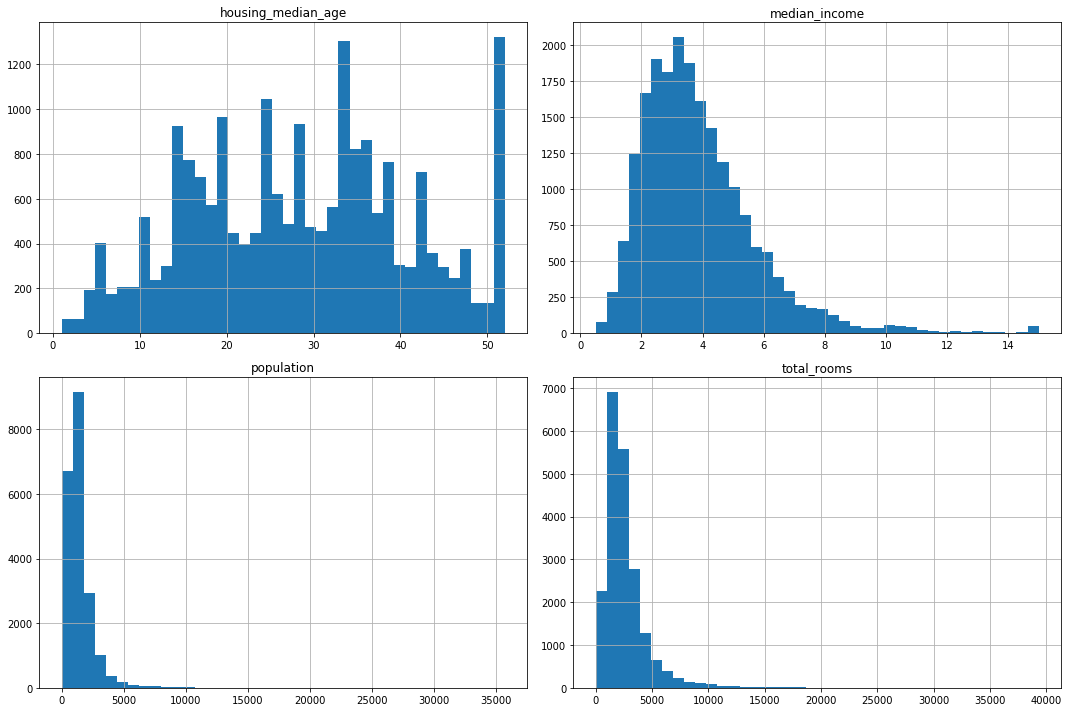

In [56]:
#Data Visualization
housing.hist(column=["total_rooms","population","median_income","housing_median_age"],bins=40, figsize=(15,10))
fig_saver("price_comparison")
plt.show()

In [57]:
#Seperating Our Data:
def split_train_test(dataset, test_ratio):
    #Shuffling the Data before Spliting(Getting Random Index of the Data)
    shuffled_indices = np.random.permutation(len(dataset))
    test_ratio_size = int(len(dataset) * test_ratio)
    #Creating the Indices of the Test and Train Dataset 
    test_data_indices = shuffled_indices[:test_ratio_size]
    train_data_indices = shuffled_indices[test_ratio_size:]
    #Final Dataframe of the Dataset
    test_final_data = dataset.iloc[test_data_indices,:]
    train_final_data = dataset.iloc[train_data_indices,:]
    return test_final_data, train_final_data


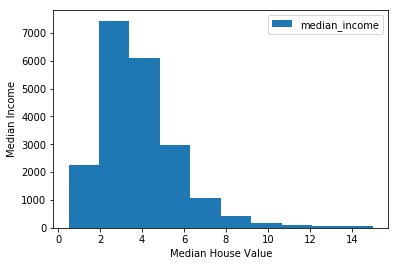

In [58]:
housing.plot(kind="hist",y="median_income",x="median_house_value")
plt.xlabel("Median House Value"); plt.ylabel("Median Income")
plt.show()

In [59]:
#Creating Category for Median Income:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],
                                labels=[1,2,3,4,5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

Text(0.5, 0, 'Income Ranges')

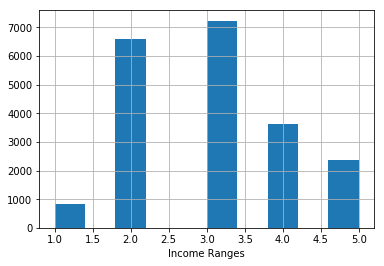

In [60]:
housing['income_cat'].hist()
plt.xlabel("Income Ranges")

In [61]:
#Creating Validation Set for Model
from sklearn.model_selection import StratifiedShuffleSplit
#Creating Instance of the Class
ss_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

#Creating the Test and Train Set Validation set Indices
for train_index, test_index in ss_split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index,:]
    strat_test_set  = housing.loc[test_index,:]

In [68]:
#Getting the Test and Train Data
test_data, train_data = split_train_test(dataset=housing,test_ratio=0.20)
print(f'No. of Random Test Data: {len(test_data)} \nNo. of Random Train Data: {len(train_data)}')

No. of Random Test Data: 4128 
No. of Random Train Data: 16512


In [93]:
#This Contains Only the Numeric Data
housing_sample = strat_train_set.copy()
print(f"The Length of the Sample Data {len(housing_sample)}")

The Length of the Sample Data 16512


In [70]:
#Calculating the Proportion of the Income in Dataset
def income_cata_proportion(data):
    x = data['income_cat'].value_counts() / len(data)
    return x

#DataFrame for Income Category Proportion in Actual Data, Random Set and Validation Set
def proportion_frame(data, random_set, validation_set):
    df_pro_osr_wrs = pd.DataFrame({
            "OverAll Dataset": income_cata_proportion(data),
            "Validation / Stratified": income_cata_proportion(validation_set),
            "Random Set": income_cata_proportion(random_set)
    }).sort_index()
    df_pro_osr_wrs["Random %Error"] = 100*((df_pro_osr_wrs['Random Set']/df_pro_osr_wrs['OverAll Dataset'])-100) 
    df_pro_osr_wrs['Stratified %Error'] = 100*((df_pro_osr_wrs['Validation / Stratified']/df_pro_osr_wrs['OverAll Dataset'])-100)
    return df_pro_osr_wrs

In [71]:
proportion_frame(housing, test_data, strat_test_set)

,OverAll Dataset,Validation / Stratified,Random Set,Random %Error,Stratified %Error
1,0.039826,0.039729,0.037064,-9906.934307,-9900.243309
2,0.318847,0.318798,0.324612,-9898.191764,-9900.015195
3,0.350581,0.350533,0.349806,-9900.221117,-9900.013820
4,0.176308,0.176357,0.175145,-9900.659522,-9899.972520
5,0.114438,0.114583,0.113372,-9900.931414,-9899.872989


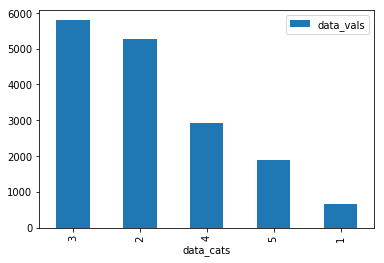

In [72]:
df = pd.DataFrame(data=housing_sample['income_cat'].value_counts())
df.reset_index(drop=True)
array = df.index.values
income_values = df['income_cat'].values 
plot_df = pd.DataFrame(data=[array,income_values],columns=['data_cats','data_vals'])
plot_df.plot(x='data_cats', y='data_vals', kind='bar',)

### Ploting the Data in California Map -- Geographical Ploting

File: color-population-cal Saved to: images/color-population-cal.png


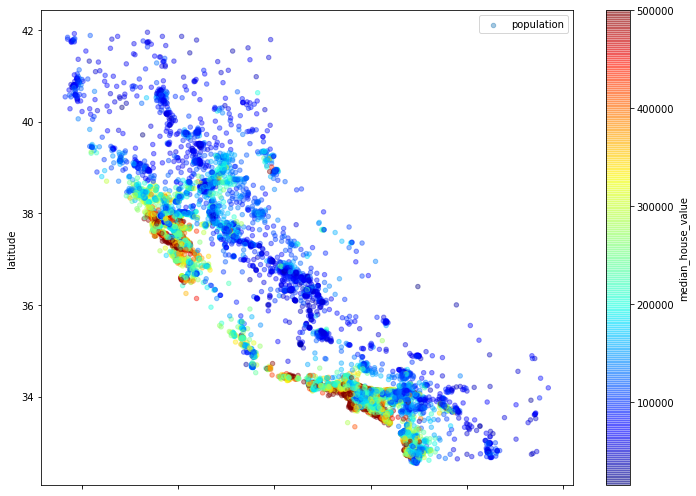

In [73]:
#Showing With the Population density Side Bar
housing_sample.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4, figsize=(10,7),
                     label="population",c="median_house_value", 
                    cmap=plt.get_cmap("jet"), colorbar=True)
fig_saver("color-population-cal")

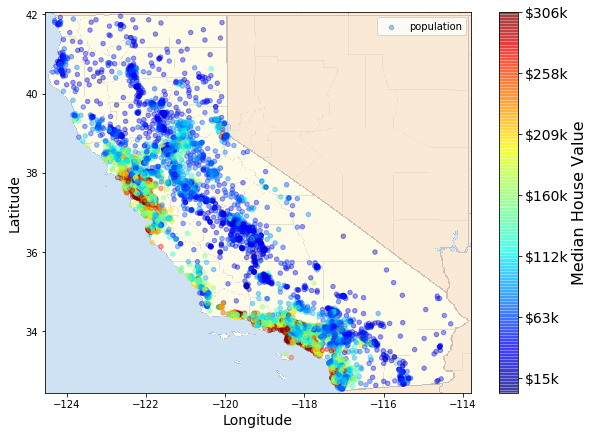

File: California-Housing-Pricing Saved to: images/California-Housing-Pricing.jpg


<Figure size 432x288 with 0 Axes>

In [74]:
#Ploting the Data in the California Map
#C--> Denotes the Color of the Plots in the Graph
california_img = mpl.image.imread("images/california.png")
ax = housing_sample.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4, figsize=(10,7),
                     label="population",c="median_house_value", 
                    cmap=plt.get_cmap("jet"), colorbar=False)
#This is California Map Image in RGB
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05],alpha=0.5,cmap=plt.get_cmap("jet"))
plt.xlabel("Longitude",fontsize=14)
plt.ylabel("Latitude",fontsize=14)

#Color Bar Definitions
prices = housing_sample['median_house_value']
cbar_tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(x/1000)) for x in cbar_tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

#Saving and Retrieve the PLT Image
plt.show()
fig_saver("California-Housing-Pricing",file_type="jpg")

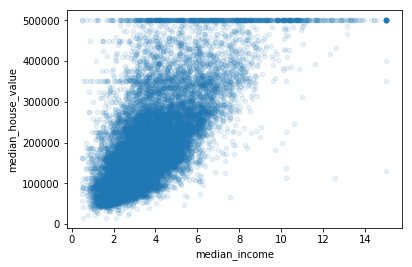

In [75]:
#Ploting Median Income And Median House Value
housing_sample.plot(x="median_income", y="median_house_value", kind="scatter",alpha=0.1)

In [76]:
#Preparing the Data for Machine Learning.

housing = strat_train_set.drop("median_house_value", axis=1, inplace=False)
housing_labels = strat_train_set["median_house_value"].copy()

In [77]:
nan_data_sample = housing[housing.isnull().any(axis=1)].head()
nan_data_sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [78]:
#Droping the total_bedrooms Column as it Contains Many Nan
nan_data_sample.drop(["total_bedrooms"],axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3


In [79]:
ocean_approx = housing['ocean_proximity']

In [80]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3


### Lable Encoding in Pandas is tool for Encoding the String Categorical Attrs into a Integer with Series.factorize() Method but OrdinalEncoder Class is Introduced in Scikit-learn in 0.20 which is Preferable

In [81]:
#Lable Encoding for Ocean Proximity
#Since the Version Changes with Let's Import for Earlier Version as Well
try:#Current One
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:#Versions Under 0.20
    from future_encoders import OrdinalEncoder

In [82]:
#Creating the Instance
Ordinal_Encoder = OrdinalEncoder()
housing_ocepro = housing[["ocean_proximity"]]
housing_ocepro_encoded = Ordinal_Encoder.fit_transform(housing_ocepro)
#Encoded Returns an Array
housing_ocepro_encoded[:3]

array([[0.],
       [0.],
       [4.]])

In [83]:
#The Numeric Values Correspondence to the Categories
#The Values the "housing_ocepro_encoded" array Correspondes to the Index of below Array
Ordinal_Encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One-Hot Encoding the Ocean Proximity Data

In [84]:
#SciKit-Learn Has Build-In One-Hot-Encoding Class
try:
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder
    
one_hot_encoder = OneHotEncoder()
housing_ocepro_one_hot = one_hot_encoder.fit_transform(housing_ocepro)
housing_ocepro_one_hot
#It returns a SPARSE Matrix Because most of the Elements in Array are 0's
#One-Hot-Encoding

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
#Getting the One_hot_encoded Matrix
housing_ocepro_one_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### SciKit-Learn Provides a Class "Imputer" to take care of the Missing Values. Here we are Filling the Median of the Values in the Field to the Missing or NaN Fields

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#Since the Median is for the Numeric Data, We Want to Drop the Cols that Contains str
housing_4_imputer = housing.drop(["ocean_proximity"], axis=1, inplace=False)
imputer.fit(housing_4_imputer)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [87]:
#Finding the Total Sum of NaN Values in Each Colm in our Database
housing.isna().sum()
#It's Good Drop the Total BedRooms as it Overflows the Threshold Value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

### Sklearn Provides Many Useful Data Transformers API But It's Better to Write Our Own Transformer for a Specific Data Transformation Task

In [288]:
#Here we are Trying to Extract Some Extra Feactures for Data Analytics Needs and Accuracy Too.
from sklearn.preprocessing import FunctionTransformer

#Getting the Indices of the Colmns
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_feacture(DATA):
    rooms_per_household = (DATA[:,rooms_ix]/DATA[:,household_ix])
    population_per_household = (DATA[:,population_ix]/DATA[:,household_ix])
    return np.c_[DATA,rooms_per_household,population_per_household]

arrribute_adder = FunctionTransformer(func=add_extra_feacture,validate=False)
housing_w_attr = arrribute_adder.fit_transform(housing.values)
housing_w_attr

array([[-121.89, 37.29, 38.0, ..., 2, 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., 5, 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 2, 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 3, 6.34640522875817, 2.742483660130719],
       [-118.01, 33.82, 31.0, ..., 3, 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 3, 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [289]:
#Creating the Pipe-Line for the Numeric Data Transformation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#The Ocean Proximity is the Only Str Data in the Dataset
housing_numeric_data = housing.drop("ocean_proximity",inplace=False,axis=1).copy()
housing_str_data = housing['ocean_proximity'].copy()

In [290]:
#Setting-Up Our Pipe-Line
num_data_pipeline = Pipeline([
            ('imputer',SimpleImputer(strategy="median")),
            ('attribs_adder',FunctionTransformer(add_extra_feacture,validate=False)),
            ('std_scaler', StandardScaler()),
    ])
housing_num_data = num_data_pipeline.fit_transform(housing_numeric_data)

In [291]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3


In [292]:
from sklearn.compose import ColumnTransformer
#Seperating the Column Names of Numeric and Cat Input in Data
num_attr = housing_numeric_data.columns
cat_attr = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num_data',num_data_pipeline, num_attr),
    ('cat_data',OneHotEncoder(),cat_attr),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [293]:
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
       -0.08649871,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [294]:
housing_prepared = pd.DataFrame(housing_prepared)

In [295]:
housing_labels = pd.DataFrame(housing_labels)
round(0.20*16512)

3302

In [296]:
housing_train_fec = housing_prepared.loc[:13210,:]
housing_train_lab = housing_labels.loc[:13210,:]
housing_test_fec = housing_prepared.loc[13210:,:]
housing_test_lab = housing_labels.loc[13210:,:]

## Selecting and Training the Machine Learning Model

In [297]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(housing_prepared,housing_labels,test_size=0.20, random_state=42)

In [298]:
from sklearn.linear_model import LinearRegression

#Creating an instance of the Model
linear_regression = LinearRegression()
linear_regression.fit(housing_train_fec,housing_train_lab)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [299]:
housing_prediction = linear_regression.predict(housing_test_fec)

In [300]:
import pickle
model_name = 'linear-mode-cal-housing-pred'
pickle.dump(linear_regression,open(model_name,'wb'))

In [314]:
housing.head(1)
loaded_model = pickle.load(open(model_name,'rb'))